# Implementação de modelos baseline (naïve) para a previsão de séries temporais

#### Todos os códigos e arquivos são baseados nas implementações do livro "Time Series Forecasting in Python", de Marco Peixeiro.

#### Repositório com os arquivos necessários: https://github.com/marcopeix/TimeSeriesForecastingInPython/tree/master/data

---

### Bibliotecas necessárias

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configuração dos plots
plt.style.use(['notebook', 'grid', 'science'])
plt.rcParams['figure.figsize'] = [7, 4.5]

---

## O que são modelos baseline?

Modelos baseline (linha de base) são modelos de rápida implementação e arquitetura simples para a previsão "ingênua" de séries temporais. Eles devem servir como referência para a avaliação de modelos mais complexos, uma vez que representam a previsão mais "simplista" que se pode fazer dos dados.

No livro, o autor sugere três tipos de baseline: modelos baseados na **média**, modelos baseados no **valor anterior** e modelos baseados na **sazonalidade**.

- ### Modelos baseados na média

O primeiro tipo de modelo baseline é o baseado na média dos valores anteriores da série temporal. Em suma, o modelo assume que os próximos $n$ valores da série serão iguais à média dos últimos $n$ valores da série.

#### Leitura e divisão dos dados

In [24]:
# Dados para o problema
#
# Os dados são referentes ao EPS (earnings per share - lucro por ação) da Johnson & Johnson em cada trimestre do ano, sendo 
# os mesmos amostrados de 1969 a 1980 
data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/jj.csv')

# Divisão em treino e teste (os dados de 1980 serão utilizados para testar o modelo)
train = data[:-4]
test = data[-4:]

#### Modelo baseado na média histórica

O primeiro modelo ingênuo baseado na média utilizará a média histórica do EPS da empresa, isto é, a média do EPS em todo o período de treinamento, como previsão do EPS em 1980.

In [76]:
# Média histórica dos dados (arredondada para 2 casas decimais para ser compatível com os demais dados)
historical_mean = np.round(np.mean(train['data'].values), 2)

# Criação dos dados de previsão (adiciona-se uma coluna ao dataset de teste contendo as previsões para cada período)
test.loc[:, 'historical_mean_predict'] = historical_mean

# Avaliação do modelo
#
# A métrica de qualidade será o MAPE (mean absolute percentage error - erro percentual absoluto médio), que mede,
# em pontos percentuais, quanto a previsão desviou das medidas reais
def mape(expected, predicted):
    '''
    Calcula o erro percentual absoluto médio do modelo de previsão\n
    
    Input:
            expected --> vetor com dados esperados\n
            predicted --> vetor com dados previstos\n
    
    Output:
            MAPE --> erro percentual absoluto médio do modelo
    '''
    MAPE = np.mean((np.abs(expected - predicted))/expected)
    return(MAPE)
#
# Cálculo do MAPE para o modelo
mape_historical_mean = mape(test['data'].values, test['historical_mean_predict'].values)
print(f'''Erro do modelo ingênuo baseado na média histórica: {round(mape_historical_mean, 3)*100}%''')

Erro do modelo ingênuo baseado na média histórica: 70.0%


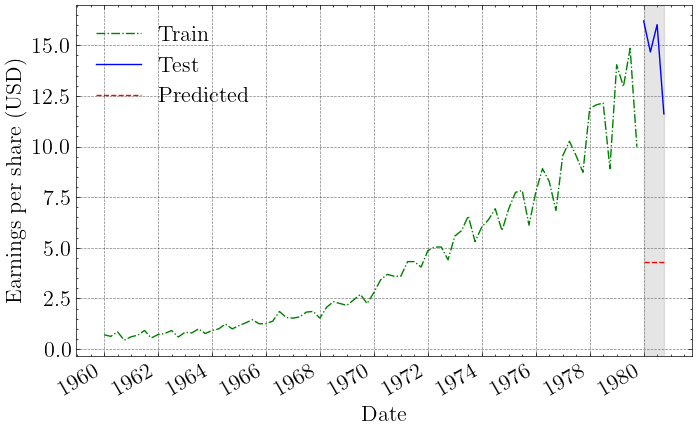

In [48]:
# Criação de objetos figure (pode conter diversos axis) e axis (onde se plota os dados)
fig, ax = plt.subplots()

# Criação de três gráficos: um para o treino (verde, dash-dot), um para o teste (azul, linha contínua) e um para
# a previsão (vermelho, dashed)
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['historical_mean_predict'], 'r--', label='Predicted')

# Setando labels do gráfico
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Criando retângulo cinza na região correspondente ao teste
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Setando legenda do gráfico
ax.legend(loc=2)

# Setando marcações do eixo x
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Setando gráfico para autoformatar marcações do eixo x, evitando overlapping
fig.autofmt_xdate()

# Fazendo gráfico ocupar o máximo espaço possível na figura
plt.tight_layout()

#### Modelo baseado na média do último ano

O segundo modelo ingênuo baseado na média utilizará a média do EPS no último ano (1979) para prever o ano atual (1980). Essa metodologia parece mais plausível, uma vez que observa-se nos dados uma tendência acelerada de crescimento, sendo dados muito antigos pouco representativos para a previsão dos novos dados.

In [77]:
# Média no último ano (arredondada para 2 casas decimais para ser compatível com os demais dados)
#
# Usa-se as 4 últimas amostras do dataset de treino porque cada amostra é referente a um trimestre. Desse modo, considera-se
# os dados referentes aos 4 trimestres de 1979
last_year_mean = np.round(np.mean(train['data'].iloc[-4:].values), 2)

# Criação dos dados de previsão (adiciona-se uma coluna ao dataset de teste contendo as previsões para cada período)
test.loc[:, 'last_year_mean_predict'] = last_year_mean

# Cálculo do MAPE para o modelo
mape_last_year_mean = mape(test['data'].values, test['last_year_mean_predict'].values)
print(f'''Erro do modelo ingênuo baseado na média do último ano: {round(mape_last_year_mean, 3)*100}%''')

Erro do modelo ingênuo baseado na média do último ano: 15.6%


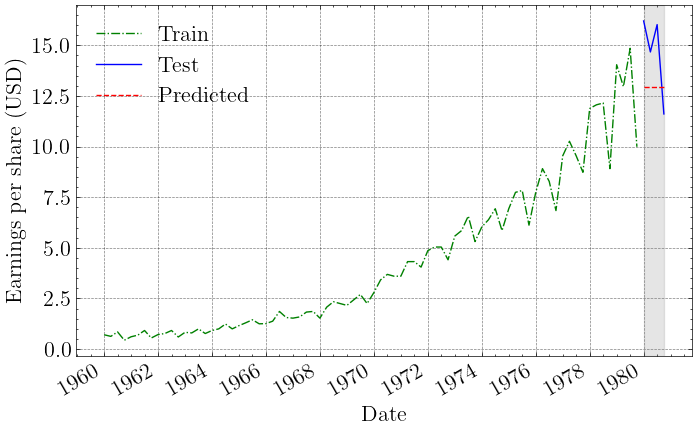

In [78]:
# Criação de objetos figure (pode conter diversos axis) e axis (onde se plota os dados)
fig, ax = plt.subplots()

# Criação de três gráficos: um para o treino (verde, dash-dot), um para o teste (azul, linha contínua) e um para
# a previsão (vermelho, dashed)
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['last_year_mean_predict'], 'r--', label='Predicted')

# Setando labels do gráfico
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Criando retângulo cinza na região correspondente ao teste
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Setando legenda do gráfico
ax.legend(loc=2)

# Setando marcações do eixo x
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Setando gráfico para autoformatar marcações do eixo x, evitando overlapping
fig.autofmt_xdate()

# Fazendo gráfico ocupar o máximo espaço possível na figura
plt.tight_layout()

- ### Modelos baseados no último valor observado

Observando que dados mais recentes foram mais adequados para a previsão do EPS, uma abordagem intuitiva é considerar que o valor do EPS em 1980 será próximo do último valor amostrado em 1979.

In [85]:
# Último valor observado
last_sample = train['data'].iloc[-1]

# Criação dos dados de previsão (adiciona-se uma coluna ao dataset de teste contendo as previsões para cada período)
test.loc[:, 'last_sample_predict'] = last_sample

# Cálculo do MAPE para o modelo
mape_last_sample = mape(test['data'].values, test['last_sample_predict'].values)
print(f'''Erro do modelo ingênuo baseado no último valor observado: {round(mape_last_sample, 3)*100}%''')

Erro do modelo ingênuo baseado no último valor observado: 30.5%


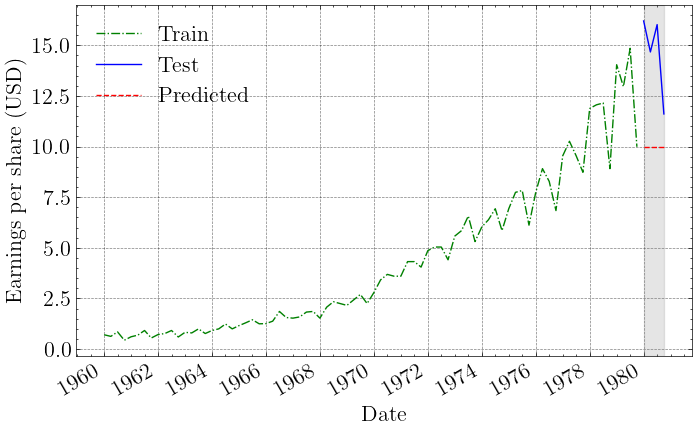

In [87]:
# Criação de objetos figure (pode conter diversos axis) e axis (onde se plota os dados)
fig, ax = plt.subplots()

# Criação de três gráficos: um para o treino (verde, dash-dot), um para o teste (azul, linha contínua) e um para
# a previsão (vermelho, dashed)
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['last_sample_predict'], 'r--', label='Predicted')

# Setando labels do gráfico
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Criando retângulo cinza na região correspondente ao teste
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Setando legenda do gráfico
ax.legend(loc=2)

# Setando marcações do eixo x
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Setando gráfico para autoformatar marcações do eixo x, evitando overlapping
fig.autofmt_xdate()

# Fazendo gráfico ocupar o máximo espaço possível na figura
plt.tight_layout()

- ### Modelos baseados em sazonalidade

Apesar de parecer uma hipótese plausível, utilizar o último valor amostrado como previsão para os valores futuros não resultou em melhorias no modelo. Isso se deve à componente sazonal dos dados, que levou a uma queda considerável no EPS do último trimestre de 1979 que não se manteve no trimestre seguinte.

Para incorporar o conhecimento de sazonalidade nos nossos dados sem perder o conhecimento de tendência, podemos simplesmente considerar que os dados do próximo ano serão iguais aos dado do ano atual.

In [94]:
# Dados do último ano
last_year_data = train['data'].iloc[-4:].values

# Criação dos dados de previsão (adiciona-se uma coluna ao dataset de teste contendo as previsões para cada período)
test.loc[:, 'last_year_data_predict'] = last_year_data

# Cálculo do MAPE para o modelo
mape_last_year_data = mape(test['data'].values, test['last_year_data_predict'].values)
print(f'''Erro do modelo ingênuo baseado no último valor observado: {round(mape_last_year_data*100, 3)}%''')

Erro do modelo ingênuo baseado no último valor observado: 11.562%


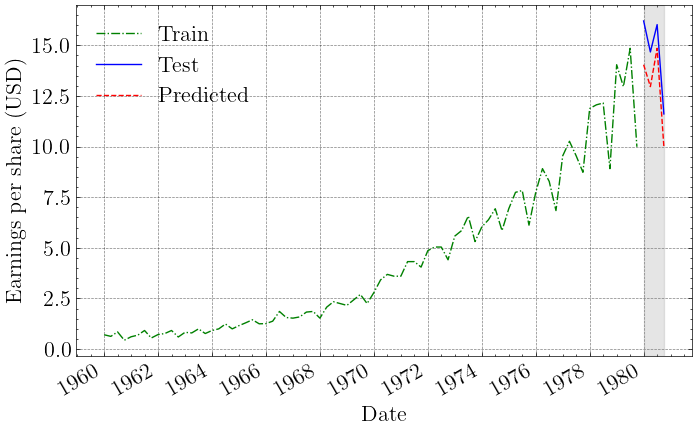

In [95]:
# Criação de objetos figure (pode conter diversos axis) e axis (onde se plota os dados)
fig, ax = plt.subplots()

# Criação de três gráficos: um para o treino (verde, dash-dot), um para o teste (azul, linha contínua) e um para
# a previsão (vermelho, dashed)
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['last_year_data_predict'], 'r--', label='Predicted')

# Setando labels do gráfico
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Criando retângulo cinza na região correspondente ao teste
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Setando legenda do gráfico
ax.legend(loc=2)

# Setando marcações do eixo x
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Setando gráfico para autoformatar marcações do eixo x, evitando overlapping
fig.autofmt_xdate()

# Fazendo gráfico ocupar o máximo espaço possível na figura
plt.tight_layout()

---

### Compilação dos resultados

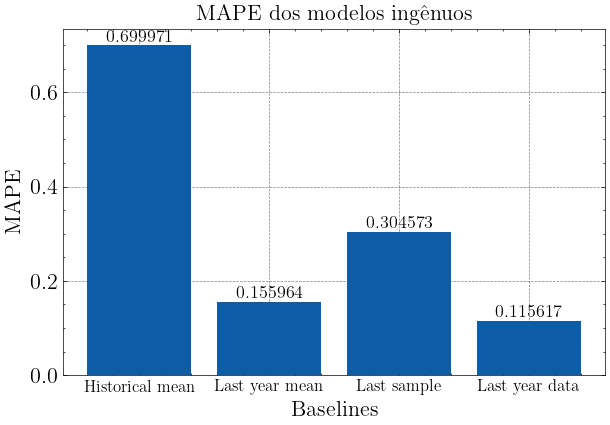

In [125]:
fig, ax = plt.subplots()

# Gráfico de barras com o erro percentual de cada modelo
ax.bar(['Historical mean', 'Last year mean', 'Last sample', 'Last year data'],
       [mape_historical_mean, mape_last_year_mean, mape_last_sample, mape_last_year_data])

# Colocando altura da barra em cima da barra
for i in ax.containers:
    ax.bar_label(i, fontsize=13)

# Labels nos eixos
ax.set_ylabel('MAPE')
ax.set_xlabel('Baselines')

# Ajuste das labels no eixo x
ax.tick_params(axis='x', labelsize=12)

# Título
ax.set_title('MAPE dos modelos ingênuos')

plt.show()